<a href="https://colab.research.google.com/github/mafegomez-c/Laboratorio-fisica-moderna/blob/main/Termogenerador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendiente: 0.0626 ± 0.0013
Intercepto: -0.1638 ± 0.0168


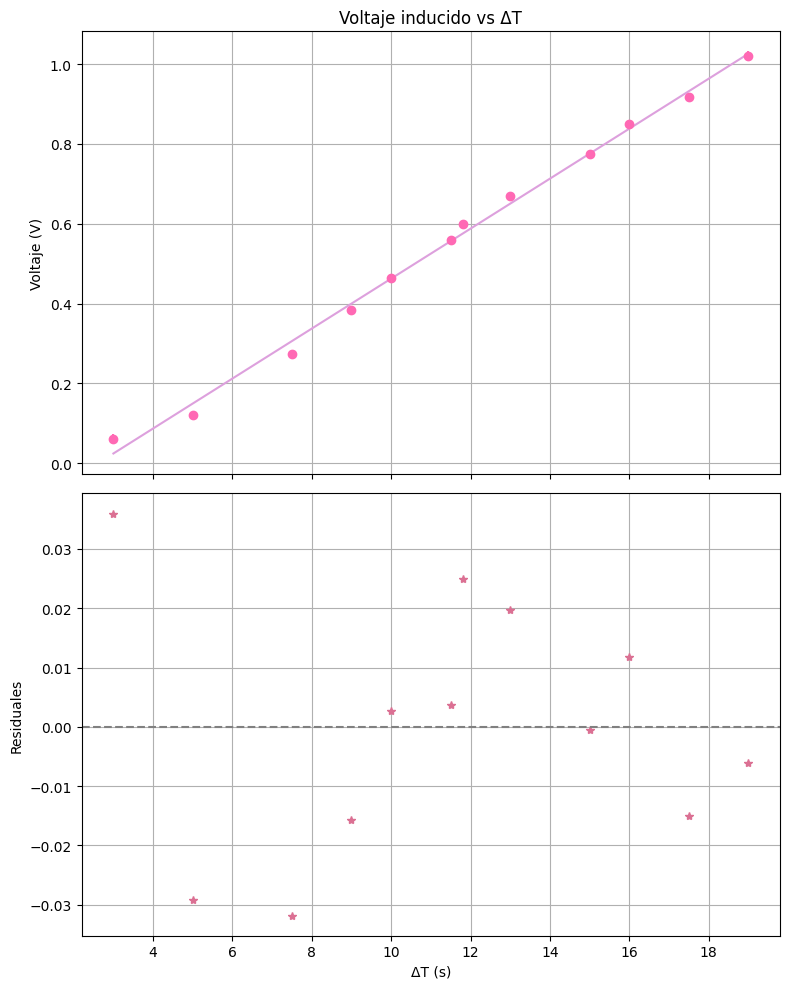

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcion_ajuste(x, a, b):
    return a * x + b
Voltaje = np.array([0.06, 0.12, 0.274, 0.384, 0.465, 0.56, 0.6, 0.67, 0.775, 0.85, 0.917, 1.02])
ΔT = np.array([3, 5, 7.5, 9, 10, 11.5, 11.8, 13, 15, 16, 17.5, 19])

popt, pcov = curve_fit(funcion_ajuste, ΔT, Voltaje)
pendiente, intercepto = popt
perr = np.sqrt(np.diag(pcov))

incertidumbre_pendiente = perr[0]
incertidumbre_intercepto = perr[1]

print(f"Pendiente: {pendiente:.4f} ± {incertidumbre_pendiente:.4f}")
print(f"Intercepto: {intercepto:.4f} ± {incertidumbre_intercepto:.4f}")

x_ajustado = np.linspace(min(ΔT), max(ΔT), 100)
y_ajustado = funcion_ajuste(x_ajustado, pendiente, intercepto)

yerr = np.sqrt(pcov[0,0]*ΔT**2 + pcov[1,1] + 2*pcov[0,1]*ΔT)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

ax1.errorbar(ΔT, Voltaje, yerr=yerr, fmt='o', color='hotpink')
ax1.plot(x_ajustado, y_ajustado, color='plum')
ax1.set_ylabel("Voltaje (V)")
ax1.set_title("Voltaje inducido vs ΔT")
ax1.grid(True)

residuals = Voltaje - funcion_ajuste(ΔT, pendiente, intercepto)
ax2.plot(ΔT, residuals, marker="*", linestyle=" ", color="palevioletred")
ax2.axhline(y=0, color="gray", linestyle="--")
ax2.set_xlabel("ΔT (s)")
ax2.set_ylabel("Residuales")
ax2.grid(True)

plt.tight_layout()
plt.show()


Pendiente: 2.1756 ± 0.0575
Intercepto: -6.2658 ± 0.7160


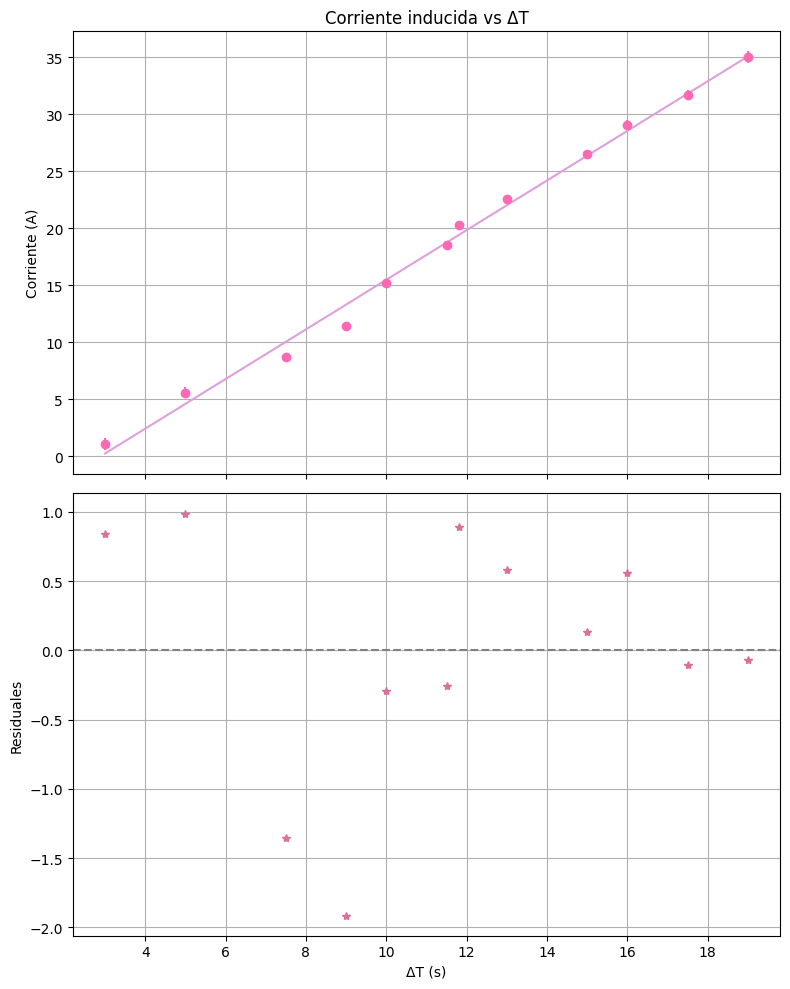

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcion_ajuste(x, a, b):
    return a * x + b

corriente = np.array([1.1, 5.6, 8.7, 11.4, 15.2, 18.5, 20.3, 22.6, 26.5, 29.1, 31.7, 35])
ΔT = np.array([3, 5, 7.5, 9, 10, 11.5, 11.8, 13, 15, 16, 17.5, 19])

popt, pcov = curve_fit(funcion_ajuste, ΔT, corriente)
pendiente, intercepto = popt
perr = np.sqrt(np.diag(pcov))

incertidumbre_pendiente = perr[0]
incertidumbre_intercepto = perr[1]

print(f"Pendiente: {pendiente:.4f} ± {incertidumbre_pendiente:.4f}")
print(f"Intercepto: {intercepto:.4f} ± {incertidumbre_intercepto:.4f}")

x_ajustado = np.linspace(min(ΔT), max(ΔT), 100)
y_ajustado = funcion_ajuste(x_ajustado, pendiente, intercepto)

yerr = np.sqrt(pcov[0,0]*ΔT**2 + pcov[1,1] + 2*pcov[0,1]*ΔT)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

ax1.errorbar(ΔT, corriente, yerr=yerr, fmt='o', color='hotpink')
ax1.plot(x_ajustado, y_ajustado, color='plum')
ax1.set_ylabel("Corriente (A)")
ax1.set_title("Corriente inducida vs ΔT")
ax1.grid(True)

residuals = corriente - funcion_ajuste(ΔT, pendiente, intercepto)
ax2.plot(ΔT, residuals, marker="*", linestyle=" ", color="palevioletred")
ax2.axhline(y=0, color="gray", linestyle="--")
ax2.set_xlabel("ΔT (s)")
ax2.set_ylabel("Residuales")
ax2.grid(True)

plt.tight_layout()
plt.show()

Serie 1:
  V0 = 0.9218 V
  Ri = 0.0014 Ω
  Icc = 653.2208 A

Serie 2:
  V0 = 1.6263 V
  Ri = 0.0040 Ω
  Icc = 401.5805 A

Serie 3:
  V0 = 1.9106 V
  Ri = 0.0034 Ω
  Icc = 570.1067 A

Serie 4:
  V0 = 2.3898 V
  Ri = 0.0027 Ω
  Icc = 878.6035 A

Serie 5:
  V0 = 2.6608 V
  Ri = 0.0032 Ω
  Icc = 838.5175 A



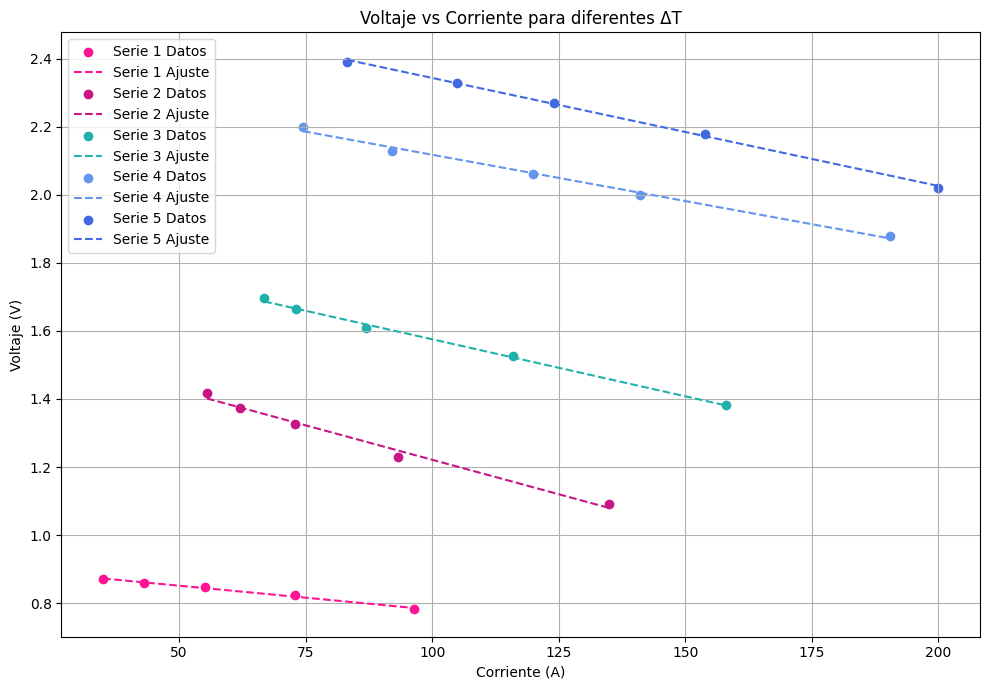

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def ajuste_lineal(I, a, b):
    return a + b * I

series = [
    ([96.4, 73, 55.2, 43, 35], [0.782, 0.824, 0.846, 0.86, 0.87]),
    ([135, 93.2, 73, 62, 55.5], [1.09, 1.23, 1.325, 1.373, 1.418]),
    ([158, 116, 87, 73.2, 66.8], [1.382, 1.525, 1.608, 1.663, 1.696]),
    ([190.5, 141, 120, 92, 74.5], [1.878, 2, 2.06, 2.13, 2.2]),
    ([200, 154, 124, 105, 83.2], [2.02, 2.18, 2.27, 2.33, 2.39])
]

colores = ['deeppink', 'mediumvioletred', 'lightseagreen', 'cornflowerblue', 'royalblue']

plt.figure(figsize=(10, 7))
for i, (corriente, voltaje) in enumerate(series):
    I = np.array(corriente)
    E = np.array(voltaje)

    popt, pcov = curve_fit(ajuste_lineal, I, E)
    a, b = popt
    E_ajuste = ajuste_lineal(I, a, b)

    Ri = abs(b)
    V0 = a
    Icc = V0 / Ri

    print(f"Serie {i+1}:")
    print(f"  V0 = {V0:.4f} V")
    print(f"  Ri = {Ri:.4f} Ω")
    print(f"  Icc = {Icc:.4f} A")
    print()

    I_fit = np.linspace(min(I), max(I), 100)
    E_fit = ajuste_lineal(I_fit, a, b)
    plt.scatter(I, E, color=colores[i], label=f'Serie {i+1} Datos')
    plt.plot(I_fit, E_fit, color=colores[i], linestyle='--', label=f'Serie {i+1} Ajuste')

plt.xlabel('Corriente (A)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje vs Corriente para diferentes ΔT')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
